In [1]:
from __future__ import print_function
import numpy as np
import warnings
import pandas as pd 
import matplotlib.pyplot as plt
import os
import keras
!pip install keras_applications
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from tensorflow.keras.utils import get_source_inputs 
from tensorflow.python.keras.utils import layer_utils 
from tensorflow.python.keras.utils.data_utils import get_file
from keras import backend as K
from tensorflow.keras.optimizers import RMSprop

from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras_applications.imagenet_utils import _obtain_input_shape
from tensorflow.keras.utils import get_source_inputs

2024-05-08 14:55:30.357535: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 14:55:30.357643: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 14:55:30.481458: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.8 MB/s eta 0:00:00


In [2]:
def VGGupdated(input_tensor=None,classes=6):    
   
    img_rows, img_cols = 150, 150   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)
   
    img_input = Input(shape=img_dim)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

 # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    
    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)
    
     # Create model.
   
     
    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model

In [3]:
model = VGGupdated(classes = 2) 
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
df = pd.read_csv("/train.csv")

NameError: name 'pd' is not defined

In [6]:
# Let's check how many samples for each category are present
print("Total number of data in the dataset: ", len(df))

data_count = df['expert_consensus'].value_counts()

print("expert_consensus data in each category: ")
print(data_count)

Total number of data in the dataset:  106800
expert_consensus data in each category: 
expert_consensus
Seizure    20933
GRDA       18861
Other      18808
GPD        16702
LRDA       16640
LPD        14856
Name: count, dtype: int64


In [1]:
df = df.drop(columns=['eeg_sub_id', 'eeg_label_offset_seconds', "spectrogram_sub_id", "spectrogram_label_offset_seconds","label_id",])
df=df.drop_duplicates(subset=("spectrogram_id"))
data_count = df['expert_consensus'].value_counts()

print("expert_consensus data in each category: ")
print(data_count)

NameError: name 'df' is not defined

In [8]:
df.replace({'GRDA':'NO'}, inplace=True)
df.replace({'Other':'NO'}, inplace=True)
df.replace({'GPD':'NO'}, inplace=True)
df.replace({'LRDA':'NO'}, inplace=True)
df.replace({'LPD':'NO'}, inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y = df['expert_consensus'].values

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[1 0 0 ... 0 0 0]


In [10]:
# Assuming y is our target variable as a 1D array or DataFrame column
y = y.reshape(-1, 1)  # Reshape to column vector 
# Create OneHotEncoder object with specified categories
onehotencoder = OneHotEncoder(categories='auto')  # 'auto' automatically determines categories
Y = onehotencoder.fit_transform(y).toarray()
print(Y.shape)  # This should print the shape of the one-hot encoded output


(11138, 2)


In [11]:
# Load spectrogram data from Parquet file
ecg_spectrogram = pd.read_parquet(PATH+'/train_spectrograms/353733.parquet')

In [12]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.applications.vgg16 import preprocess_input

# Resizing and Preprocessing Spectrogram Images
def preprocess_spectrogram(spectrogram, target_size=(150, 150)):
    # Normalizing spectrogram data to [0, 255] range 
    if spectrogram.dtype == np.float64:
        spectrogram = (spectrogram - spectrogram.min()) / (spectrogram.max() - spectrogram.min()) * 255.0
        spectrogram = spectrogram.astype(np.uint8)

    # Resize spectrogram to target size using OpenCV
    resized_spectrogram = cv2.resize(spectrogram, target_size)
    # Convert to RGB image (3 channels)
    rgb_spectrogram = cv2.cvtColor(resized_spectrogram, cv2.COLOR_GRAY2RGB)
    # Convert to array and preprocess according to VGG-16 requirements
    preprocessed_spectrogram = img_to_array(rgb_spectrogram)
    preprocessed_spectrogram = preprocess_input(preprocessed_spectrogram)
    return preprocessed_spectrogram

# Preprocess first spectrogram in the DataFrame
first_spectrogram = ecg_spectrogram.iloc[0, :].values  #each row represents a spectrogram
preprocessed_spectrogram = preprocess_spectrogram(first_spectrogram)
print(preprocessed_spectrogram.shape)

(150, 150, 3)


In [13]:
import os
path='/kaggle/input/hms-harmful-brain-activity-classification/train_spectrograms/'
images=[]
# Ignore all the warnings temporarily
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for f in os.listdir(path):
        file_path=path+f
        df = pd.read_parquet(file_path)
        first_spectrogram = df.iloc[0, :].values  # Assuming each row represents a spectrogram
        preprocessed_spectrogram = preprocess_spectrogram(first_spectrogram)
        images.append(preprocessed_spectrogram)

In [14]:
images = np.array(images)
images.shape

(11138, 150, 150, 3)

In [15]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=42)

#inspect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(8910, 150, 150, 3)
(8910, 2)
(2228, 150, 150, 3)
(2228, 2)


In [16]:
hist = model.fit(train_x, train_y, epochs=100,validation_split=0.2, verbose=2)

Epoch 1/100


2024-05-08 15:04:30.091564: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.18794, expected 3.54228
2024-05-08 15:04:30.091664: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.14647, expected 4.50081
2024-05-08 15:04:30.091674: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.30074, expected 4.65509
2024-05-08 15:04:30.091683: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 4.91575, expected 4.27009
2024-05-08 15:04:30.091691: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 3.57367, expected 2.92801
2024-05-08 15:04:30.091699: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 4.05899, expected 3.41334
2024-05-08 15:04:30.091707: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 5.27592, expected 4.63026
2024-05-08 15:04:30.091716: E external/local_xla/xla

223/223 - 76s - 341ms/step - accuracy: 0.8040 - loss: 3.8513 - val_accuracy: 0.8193 - val_loss: 0.4868
Epoch 2/100


W0000 00:00:1715180740.292691      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


223/223 - 26s - 118ms/step - accuracy: 0.8124 - loss: 0.5063 - val_accuracy: 0.8103 - val_loss: 1.2136
Epoch 3/100
223/223 - 26s - 118ms/step - accuracy: 0.7779 - loss: 123.8194 - val_accuracy: 0.8193 - val_loss: 23.8859
Epoch 4/100
223/223 - 26s - 118ms/step - accuracy: 0.8138 - loss: 7120.8691 - val_accuracy: 0.8103 - val_loss: 263163.4688
Epoch 5/100
223/223 - 41s - 184ms/step - accuracy: 0.8119 - loss: 64445804.0000 - val_accuracy: 0.8103 - val_loss: 13312917.0000
Epoch 6/100
223/223 - 26s - 118ms/step - accuracy: 0.8107 - loss: 2356.8972 - val_accuracy: 0.8193 - val_loss: 19502.2109
Epoch 7/100
223/223 - 26s - 118ms/step - accuracy: 0.8110 - loss: 209887.6250 - val_accuracy: 0.8103 - val_loss: 31204020.0000
Epoch 8/100
223/223 - 26s - 118ms/step - accuracy: 0.8054 - loss: 13398429.0000 - val_accuracy: 0.8103 - val_loss: 1309674.0000
Epoch 9/100
223/223 - 26s - 118ms/step - accuracy: 0.8012 - loss: 204110912.0000 - val_accuracy: 0.8103 - val_loss: 199411040.0000
Epoch 10/100
223/22

In [2]:
from sklearn.metrics import confusion_matrix
#Predictions on the test set
pred_y = model.predict(test_x)

NameError: name 'model' is not defined

In [18]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8282 - loss: 0.4593
Loss = 0.4681669771671295
Test Accuracy = 0.8222621083259583


W0000 00:00:1715183649.939916      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(test_y.argmax(axis=1), pred_y.argmax(axis=1), average='weighted')
recall = recall_score(test_y.argmax(axis=1),pred_y.argmax(axis=1), average='weighted')
f1 = f1_score(test_y.argmax(axis=1),pred_y.argmax(axis=1), average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.676114991506822
Recall: 0.822262118491921
F1 Score: 0.7420611827966499


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
cm = confusion_matrix(test_y.argmax(axis=1), pred_y.argmax(axis=1))

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1832    0]
 [ 396    0]]


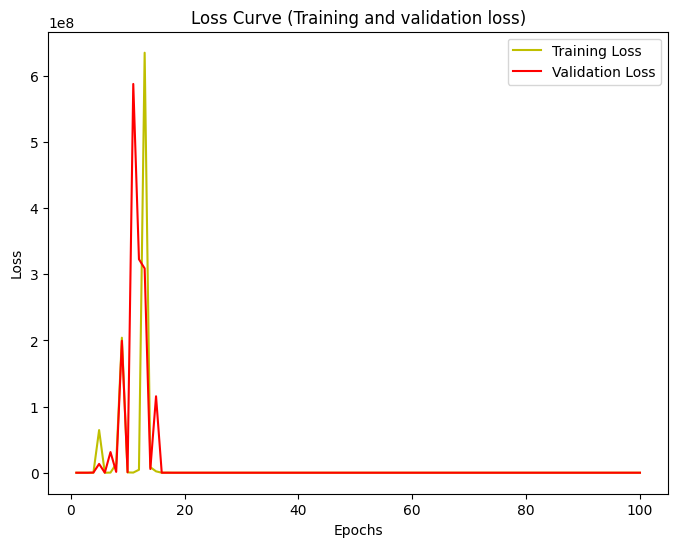

In [21]:
# Plot the training and validation loss at each epoch
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(8, 6))  
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Curve (Training and validation loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

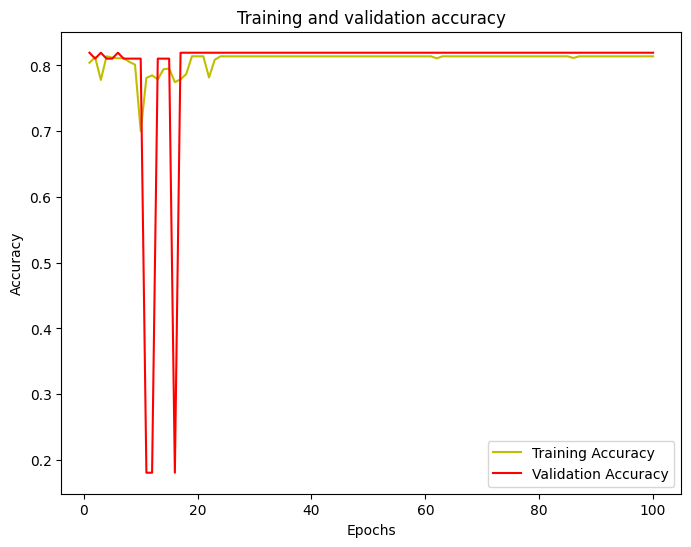

In [22]:
# Plot the training and validation accuracy at each epoch
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.figure(figsize=(8, 6))
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()